# Natural signals

In [7]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Land seismic trace

Recorded with a Vibroseis source — coming soon.

## Marine seismic trace

Recorded with an airgun source.

In [9]:
signal = np.load('benchmark_signals/raw/F3_volume_3x3_16bit.npy')

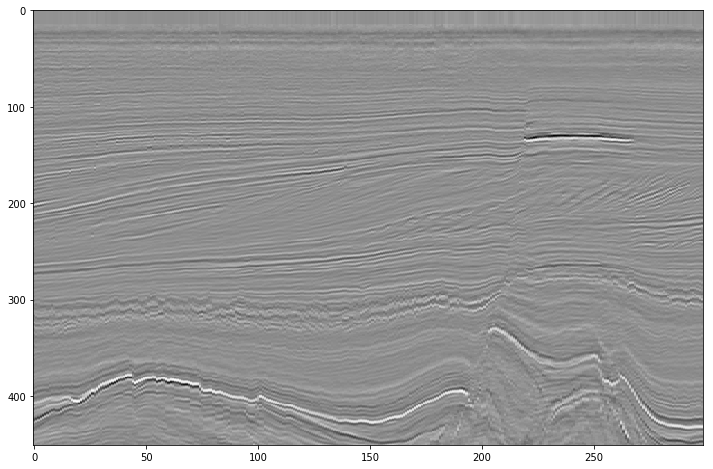

In [10]:
plt.figure(figsize=(12, 8))
plt.imshow(signal[45].T, cmap='Greys', aspect='auto')
plt.show()

In [11]:
tr_in = signal[45, 219]
tr_out = signal[45, 218]

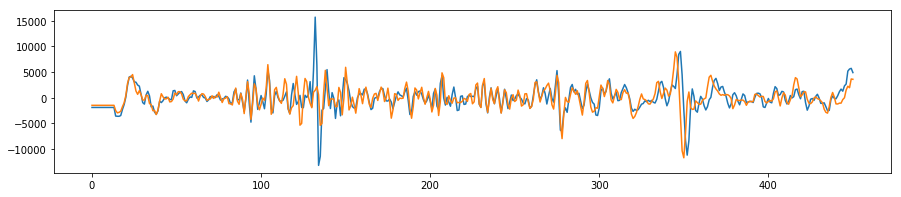

In [12]:
plt.figure(figsize=(15,3))
plt.plot(tr_in)
plt.plot(tr_out)
plt.show()

In [13]:
fs = 250

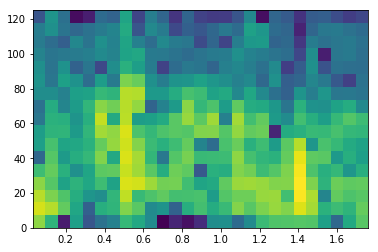

In [14]:
_ = plt.specgram(tr_in, Fs=fs, NFFT=32, noverlap=16)

We'll have to interpolate to listen to this because the sample rate is too low.

In [15]:
from scipy.interpolate import interp1d

n = 100  # Factor to subsample

oldt = np.arange(0, tr_in.size)
newt = np.arange(0, tr_in.size, 1/n)

func = interp1d(oldt, tr_in, bounds_error=False, fill_value=0)
news = func(newt)

Pitch shift to audible frequencies, discarding the low frequencies. 

In [16]:
shift = 15 # Hz
NEWS = np.fft.rfft(news)
freq = np.fft.rfftfreq(news.size, 1/fs)
shift = int(shift / freq[1])
NEWS_shift = np.roll(NEWS, shift)
NEWS_shift[:shift] = 0
news_shift = np.fft.irfft(NEWS_shift)

In [17]:
import IPython.display as ipd

# Listen to it, stretching it by a factor of 3.
ipd.Audio(news_shift, rate=n*fs/3)

In [18]:
header  = "Two neighbouring seismic traces.\n"
header += "The first trace has an amplitude anomaly at sample 132.\n"
header += "F3 seismic volume, decimated 3 x 3. Traces are 75 m apart in this data. 4 ms sample interval."
header += "(c) TNO, dGB Earth Sciences. Open Seismic Repository.\n"
header += "https://www.opendtect.org/osr/Main/NetherlandsOffshoreF3BlockComplete4GB\n"
header += f"sample rate = {fs} Hz"

In [19]:
signal = (signal/1e4).astype(np.float64)

In [20]:
np.savetxt(f'benchmark_signals/seismic_{fs}Hz.txt', np.array([tr_in, tr_out]), header=header)

## ECG record

I'm using Person 1, Record 1 from:

> Goldberger AL, Amaral LAN, Glass L, Hausdorff JM, Ivanov PCh, Mark RG, Mietus JE, Moody GB, Peng C-K, Stanley HE. PhysioBank, PhysioToolkit, and PhysioNet: Components of a New Research Resource for Complex Physiologic Signals. Circulation 101(23):e215-e220 [Circulation Electronic Pages](http://circ.ahajournals.org/cgi/content/full/101/23/e215); 2000 (June 13).

Located here: https://physionet.org/physiobank/database/ecgiddb/

Library for reading WFDB format: https://github.com/MIT-LCP/wfdb-python

In [21]:
import wfdb

record = wfdb.rdrecord('benchmark_signals/raw/rec_1') 

In [22]:
fs = record.fs

In [23]:
_, signal = record.p_signal.T

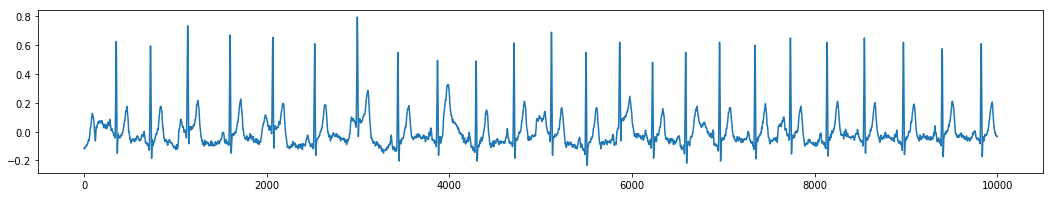

In [24]:
plt.figure(figsize=(18, 3))
plt.plot(signal)

We'll have to interpolate to listen to this because the sample rate is too low.

In [25]:
from scipy.interpolate import interp1d
import IPython.display as ipd

n = 20  # Factor to subsample

oldt = np.arange(0, signal.size)
newt = np.arange(0, signal.size, 1/n)

func = interp1d(oldt, signal, bounds_error=False, fill_value=0)
news = func(newt)

ipd.Audio(news, rate=n*fs)

(0.064, 19.904, 0, 80)

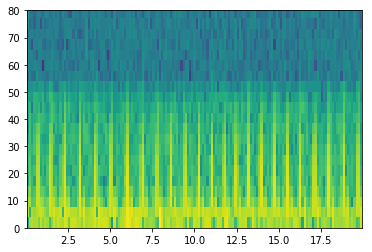

In [29]:
_ = plt.specgram(signal, Fs=fs, NFFT=128, noverlap=64)
plt.axis(ymin=0, ymax=80)

In [30]:
header  = "Human electrocardiogram, single lead, filtered.\n"
header += "(c) Goldberger et al, openly licensed, details unclear.\n"
header += f"sample rate = {fs} Hz"

In [31]:
np.savetxt(f'benchmark_signals/ecg_{fs}Hz.txt', signal, header=header)

## Speech: "SEG"

I recorded myself saying, "S E G".

In [6]:
from scipy.io import wavfile

fs, signal = wavfile.read('benchmark_signals/raw/seg_44100Hz.wav')

In [7]:
import IPython.display as ipd

ipd.Audio(signal, rate=50*fs)

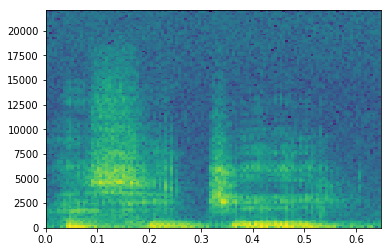

In [34]:
_ = plt.specgram(signal, Fs=44100, NFFT=256, noverlap=16)

In [35]:
header  = "Human speech: \"S E G\".\n"
header += "MXL Tempo USB condenser mic, 16 bit, 44.1 kHz.\n"
header += "(c) Agile Scientific, licensed CC-BY.\n"
header += f"sample rate = {fs} Hz"

In [36]:
np.savetxt(f'benchmark_signals/seg_{fs}Hz.txt', signal, header=header)

## Bat chirp

In [11]:
from scipy.io import wavfile

fs, signal = wavfile.read('src/47412__klankschap__bat1_.wav')

In [12]:
import IPython.display as ipd

ipd.Audio(signal, rate=fs/8)

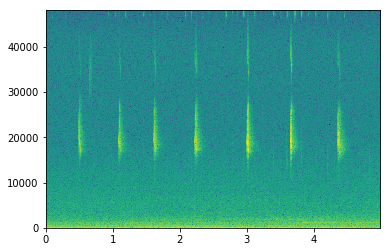

In [19]:
_ = plt.specgram(signal, Fs=fs, NFFT=1024, noverlap=64)

In [16]:
header  = "Vesper bat call.\n"
header += "2x DPA 4060 and Zoom H2 at 96 kHz, 24-bit stereo (mixed down to 16-bit mono).\n"
header += "(c) freesound.org/klankschap, licensed CC-BY-NC.\n"
header += "https://freesound.org/people/klankschap/sounds/47412/\n"
header += f"sample rate = {fs} Hz"

In [18]:
np.savetxt(f'signals/bat_{fs}Hz.txt', signal, header=header)

## Seismograph

### Landslide in Greenland

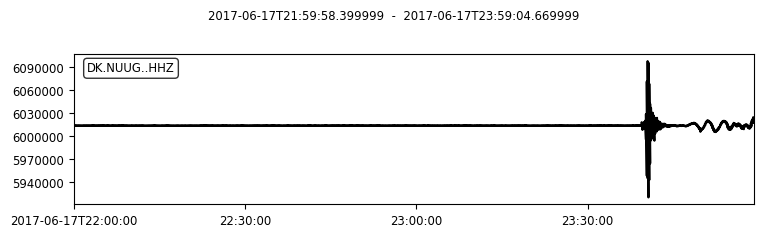

In [43]:
from obspy.clients.fdsn import Client
client = Client("GFZ")

from obspy import UTCDateTime
t = UTCDateTime("2017-06-17_22:00:00")
st = client.get_waveforms("DK", "NUUG", "*", "HHZ", t, t + 2*60*60)
st.plot()  

In [44]:
st

1 Trace(s) in Stream:
DK.NUUG..HHZ | 2017-06-17T21:59:58.399999Z - 2017-06-17T23:59:04.669999Z | 100.0 Hz, 714628 samples

In [45]:
z = st.traces[0].data
fs = st.traces[0].stats.sampling_rate

import IPython
IPython.display.Audio(z, rate=600*fs)  # speed up for listening

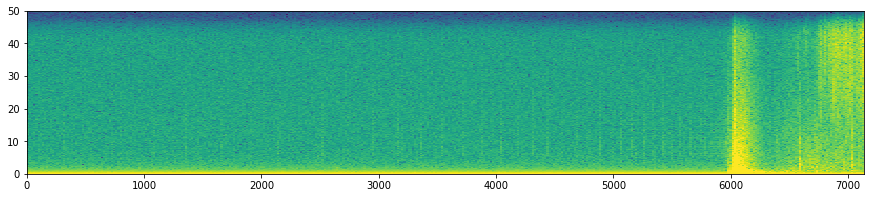

In [46]:
plt.figure(figsize=(15,3))
_ = plt.specgram(z, Fs=fs, NFFT=2048, noverlap=256, vmax=50)

In [47]:
import numpy as np

header  = "Seismograph data from Greenland landslide event.\n"
header += "DK.NUUG..HHZ | 2017-06-17T21:59:58.4Z - 2017-06-17T23:59:04.67Z | 100.0 Hz, 32 bit int\n"
header += "(c) GEUS, open access license\n"
header += "https://agilescientific.com/blog/2017/9/8/x-lines-of-python-global-seismic-data\n"
header += f"Sample rate: {fs:.0f} Hz"

np.savetxt(f'benchmark_signals/landslide_{fs:.0f}Hz.txt', z, header=header)

### North Korea nuclear test

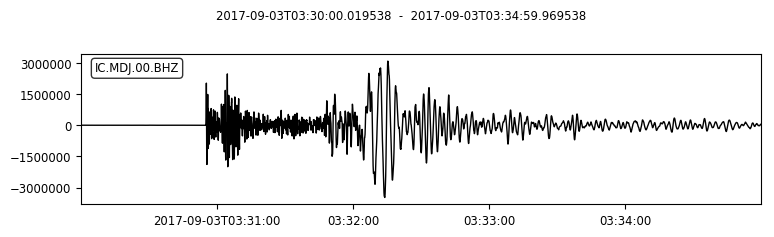

In [48]:
client = Client("IRIS")
t = UTCDateTime("2017-09-03_03:30:00")
st = client.get_waveforms("IC", "MDJ", "00", "BHZ", t, t + 5*60)
st.plot()  

In [49]:
st

1 Trace(s) in Stream:
IC.MDJ.00.BHZ | 2017-09-03T03:30:00.019538Z - 2017-09-03T03:34:59.969538Z | 20.0 Hz, 6000 samples

In [50]:
z = st.traces[0].data
fs = st.traces[0].stats.sampling_rate

import IPython
IPython.display.Audio(z, rate=30*fs)

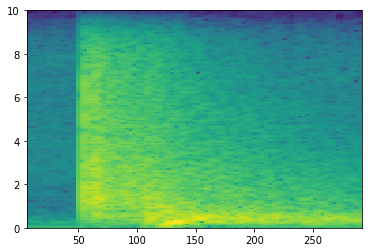

In [51]:
_ = plt.specgram(z, Fs=fs, NFFT=320, noverlap=256)

In [52]:
import numpy as np

header  = "Seismograph data from nuclear test in North Korea."
header += "IC.MDJ.00.BHZ | 2017-09-03T03:30:00.019538Z - 2017-09-03T03:34:59.969538Z | 20.0 Hz, 32 bit int"
header += "(c) Albuquerque Seismological Laboratory (ASL)/USGS. DOI: 10.7914/SN/IC"
header += "https://agilescientific.com/blog/2017/9/8/x-lines-of-python-global-seismic-data"
header += f"Sample rate: {fs:.0f} Hz"

np.savetxt(f'benchmark_signals/nuclear_{fs:.0f}Hz.txt', z, header=header)

### Hurricane Irma

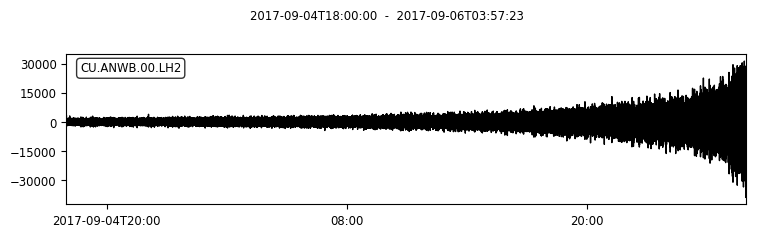

In [53]:
t0 = UTCDateTime("2017-09-04_18:00:00")
t1 = t0 + 36*60*60
st = client.get_waveforms("CU", "ANWB", "00", "LH2", t0, t1)
st.filter('highpass', freq=0.1)
st.plot()  

In [54]:
st

1 Trace(s) in Stream:
CU.ANWB.00.LH2 | 2017-09-04T18:00:00.000000Z - 2017-09-06T03:57:23.000000Z | 1.0 Hz, 122244 samples

In [55]:
z = st.traces[0].data
fs = st.traces[0].stats.sampling_rate

import IPython
IPython.display.Audio(z, rate=12000*fs)  # 12,000 speed up for listening

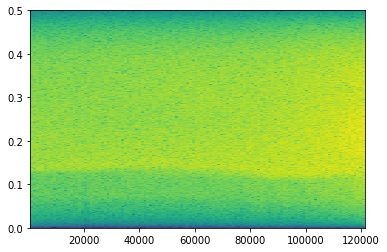

In [56]:
_ = plt.specgram(z, Fs=fs, NFFT=2048, noverlap=1024)

In [57]:
import numpy as np

header  = "Seismograph data from hurricane Irma.\n"
header += "CU.ANWB.00.LH2 | 2017-09-04T18:00:00.000000Z - 2017-09-06T03:57:23.000000Z | 1.0 Hz, 32 bit int\n"
header += "(c) Albuquerque Seismological Laboratory (ASL)/USGS. DOI: 10.7914/SN/CU\n"
header += "https://agilescientific.com/blog/2017/9/8/x-lines-of-python-global-seismic-data\n"
header += f"Sample rate: {fs:.0f} Hz"

np.savetxt(f'benchmark_signals/irma_{fs:.0f}Hz.txt', z, header=header)

### Chiapas earthquake, September 2017

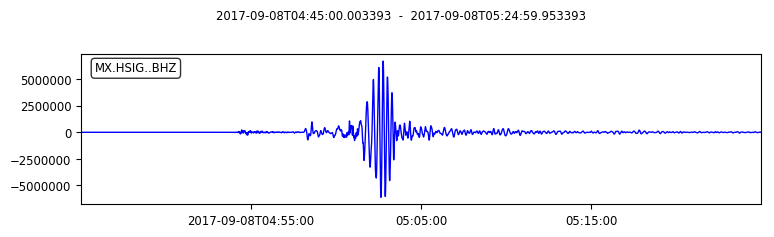

In [58]:
t = UTCDateTime("2017-09-08_04:45:00")

st = client.get_waveforms("MX", "HSIG", "*", "BHZ", t, t + 40*60)
st.plot(color='blue')  

In [59]:
st

1 Trace(s) in Stream:
MX.HSIG..BHZ | 2017-09-08T04:45:00.003393Z - 2017-09-08T05:24:59.953393Z | 20.0 Hz, 48000 samples

In [60]:
z = st.traces[0].data
fs = st.traces[0].stats.sampling_rate

import IPython
IPython.display.Audio(z, rate=500*fs)

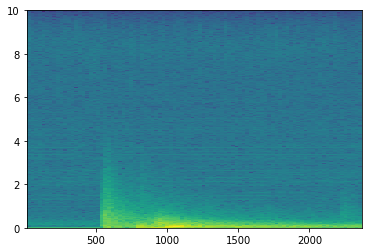

In [61]:
_ = plt.specgram(z, Fs=fs, NFFT=1024, noverlap=512)

In [62]:
header  = "Seismograph data from M8.3 Chiapas earthquake off Mexico.\n"
header += "MX.HSIG..BHZ | 2017-09-08T04:45:00.003393Z - 2017-09-08T05:04:59.953393Z | 20.0 Hz, 32 bit int\n"
header += "(c) Servicio Sismológico Nacional, Mexico, open access license\n"
header += "https://agilescientific.com/blog/2017/9/8/x-lines-of-python-global-seismic-data\n"
header += f"Sample rate: {fs:.0f} Hz"

np.savetxt(f'benchmark_signals/earthquake_{fs:.0f}Hz.txt', z, header=header)

### Mt Redoubt pre-eruption harmonic tremor

From Dmitreva et al (2013):

> Harmonic tremor in the 2009 eruption of Redoubt Volcano, Alaska, has been linked to repeating earthquakes of magnitudes around 0.5–1.5 that occur a few kilometres beneath the vent11. Before many explosions in that eruption, these small earthquakes occurred in such rapid succession—up to 30 events per second—that distinct seismic wave arrivals blurred into continuous, high-frequency tremor. Tremor abruptly ceased about 30 s before the explosions.

> Contains 15 minutes of seismicity recorded prior to explosive event 13 (03/28/09 03:24
UTC), sped up 60 times. High-frequency gliding harmonic tremor silences before the
explosion. 

More: https://doi.org/10.1038/ngeo1879. 

The following code downloads the records directly from the FDSN:

In [1]:
client = Client("IRIS")

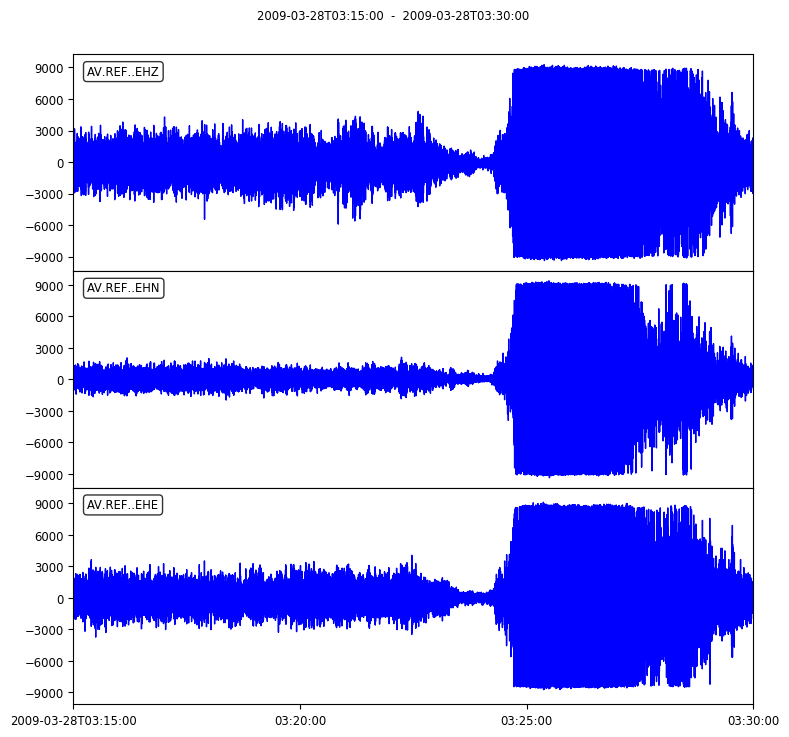

In [43]:
t = UTCDateTime("2009-03-28_03:15:00")

# Any station at Redoubt would probably do. Certainly REF, RDN and RDT both have recordings.
st = client.get_waveforms("AV", "REF", "*", "*", t, t + 15*60)
st.plot(color='blue')  

The REF (East Flank of Redoubt) station has 3 components. The E–W component sounds the clearest to me, but you can change the index yourself if you wish. `st.traces[0]` is vertical, `st.traces[1]` is N–S, `st.traces[2]` is E–W.

In [50]:
st

3 Trace(s) in Stream:
AV.REF..EHE | 2009-03-28T03:15:00.000000Z - 2009-03-28T03:30:00.000000Z | 100.0 Hz, 90001 samples
AV.REF..EHN | 2009-03-28T03:15:00.000000Z - 2009-03-28T03:30:00.000000Z | 100.0 Hz, 90001 samples
AV.REF..EHZ | 2009-03-28T03:15:00.000000Z - 2009-03-28T03:30:00.000000Z | 100.0 Hz, 90001 samples

In [54]:
z = st.traces[0].data
n = st.traces[1].data
e = st.traces[2].data
fs = st.traces[2].stats.sampling_rate

IPython.display.Audio(e, rate=60*fs)  # Speed up 60x for listening.

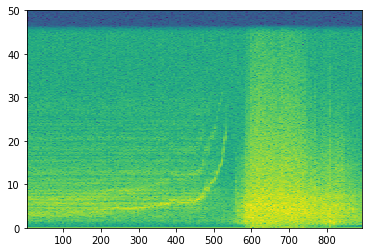

In [53]:
_ = plt.specgram(e, Fs=fs, NFFT=1024, noverlap=512)

In [57]:
header  = "Mt Redoubt gliding tremor, UTC 2009-03-28T03:20:00.\n"
header += "Recorded by USGS AVO, public domain.\n"
header += "https://avo.alaska.edu/\n"
header += f"sample rate = {fs} Hz"

In [58]:
np.savetxt(f'benchmark_signals/tremor_{fs:.0f}Hz.txt', e, header=header)

## Hydrophones

### Unexplained sound (probably volcanic)

From NOAA:

> This sound was present when PMEL began recording SOSUS in August, 1991. It consists of a long train of narrow-band upsweeping sounds of several seconds duration each. The source level is high enough to be recorded throughout the Pacific. It appears to be seasonal, generally reaching peaks in spring and fall, but it is unclear whether this is due to changes in the source or seasonal changes in the propagation environment. The source can be roughly located at 54o S, 140oW, near the location of inferred volcanic seismicity, but the origin of the sound is unresolved. The overall source level has been declining since 1991 but the sounds can still be detected on NOAA's equatorial autonomous hydrophone arrays.

Read more: https://www.pmel.noaa.gov/acoustics/sounds/upsweep.html

In [68]:
from scipy.io import wavfile

fs, signal = wavfile.read('benchmark_signals/raw/Upsweep_10s_8000Hz.wav')

In [69]:
import IPython.display as ipd

ipd.Audio(signal, rate=fs)  # This recorded is at 20x speed

In [70]:
signal.shape

(80000,)

(1.28, 198.4, 0, 80)

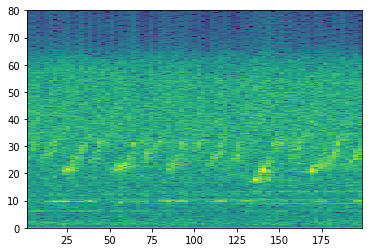

In [71]:
_ = plt.specgram(signal, Fs=fs/20, NFFT=2048, noverlap=1024, vmin=0.2)
plt.axis(ymin=0, ymax=80)

In [72]:
header  = "Mystery upsweep.\n"
header += "NOAA-PMEL, public domain.\n"
header += "https://www.pmel.noaa.gov/acoustics/sounds/upsweep.html\n"
header += f"sample rate = {fs/20} Hz"

In [73]:
np.savetxt(f'benchmark_signals/upsweep_{fs/20:.0f}Hz.txt', signal, header=header)

### Airgun

From [NOAA](https://www.pmel.noaa.gov/acoustics/env-noise/airguns.html):

> Used to explore the geologic structure below the ocean floor, seismic airguns produce "explosions" of air at regular intervals. This explosive release of air can create source amplitudes up to 240dB. The PMEL autonomous hydrophone array deployed in the central Atlantic Ocean recorded at least three different airgun sources from around the Atlantic Basin, sometimes simultaneously. The most frequent origin locations were near Nova Scotia, Canada, Northeast Brazil, and Northwest Africa. Airgun signals dominate approximately 75% of the annual data recordings.

This public domain recording is from the NOAA PMEL project, https://www.pmel.noaa.gov.

In [74]:
from scipy.io import wavfile

fs, signal = wavfile.read('benchmark_signals/raw/airguns_00_03_05_marCE-Airguns-10x.wav')

In [75]:
signal = signal[15000:115000]

In [76]:
import IPython.display as ipd

ipd.Audio(signal, rate=fs)  # This recorded is at 10x speed

(0.64, 123.52, 0, 80)

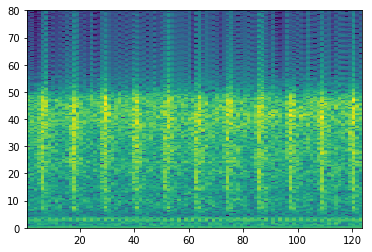

In [77]:
_ = plt.specgram(signal, Fs=fs/10, NFFT=2048, noverlap=1024, vmin=0.2)
plt.axis(ymin=0, ymax=80)

In [78]:
header  = "Airgun noise recorded by NOAA's Atlantic array.\n"
header += "NOAA-PMEL, public domain.\n"
header += "https://www.pmel.noaa.gov/acoustics/env-noise/airguns.html\n"
header += f"sample rate = {fs/10} Hz"

In [79]:
np.savetxt(f'benchmark_signals/airgun_{fs/10:.0f}Hz.txt', signal, header=header)

## Piano: Bach

This is a public domain recording of Bach's Prelude 1 in C Major, in The Well Tempered Clavier, Book 1. Recorded by Kimiko Ishizaka for the [Open Well Tempered Clavier project](https://www.welltemperedclavier.org/).

In [8]:
from scipy.io import wavfile

fs, signal = wavfile.read('benchmark_signals/raw/prelude.wav')

/home/matt/anaconda3/envs/geocomp/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [9]:
import IPython.display as ipd

ipd.Audio(signal, rate=fs)

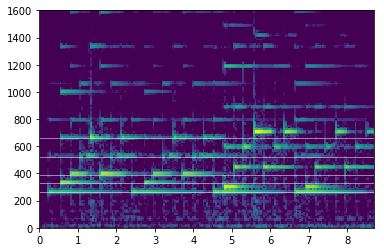

In [10]:
_ = plt.specgram(signal, Fs=fs, NFFT=2048, noverlap=1024, vmin=0.2)
plt.axis(ymin=0, ymax=1600)
plt.axis(xmin=0, xmax=8.7)

# Frequencies of notes in first bar A440 tuning.
plt.axhline(261.6, c='w', lw=0.5)  # C4
plt.axhline(329.6, c='w', lw=0.5)  # E4
plt.axhline(392.0, c='w', lw=0.5)  # G4
plt.axhline(2*261.6, c='w', lw=0.5)  # C5 (and 1st harmonic of C4)
plt.axhline(2*329.6, c='w', lw=0.5)  # E5 (and 1st harmonic of E4)

In [128]:
header  = "First 2 bars of Bach's BWV846, Prelude #1 in C Major.\n"
header += "Kimiko Ishizaka, licensed CC-BY.\n"
header += "https://www.welltemperedclavier.org/\n"
header += f"sample rate = {fs} Hz"

In [129]:
np.savetxt(f'benchmark_signals/piano_{fs:.0f}Hz.txt', signal, header=header)

## Gravitational wave

We can download the 2048 seconds of LIGO data from the Livingstone observatory (Louisiana, USA) from around the 2017 event GW170817. The event records the observation of gravitational waves from a binary neutron star inspiral. The dataset has DOI https://doi.org/10.7935/K5B8566F

The collision occurs at 1842.43 seconds in the record.

You may need to install `pyfive`:

    conda install pyfive

In [59]:
import requests
import pyfive
from io import BytesIO

url = "https://dcc.ligo.org/public/0146/P1700349/001/L-L1_LOSC_CLN_4_V1-1187007040-2048.hdf5"
r = requests.get(url)
b = BytesIO(r.content)
f = pyfive.File(b)
data = f['strain']['Strain'][:]
fs = 4096

Plot the data, marking the collision time:

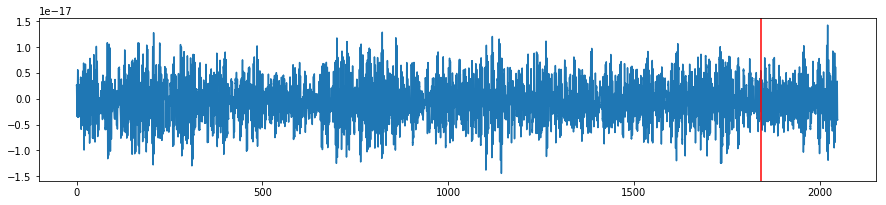

In [82]:
t = np.linspace(0, data.size/fs, data.size)

plt.figure(figsize=(15, 3))
plt.plot(t[::10], data[::10])
plt.axvline(1842.43, c='red')

In [83]:
dt = 1 / fs

idx0 = int(1600 / dt)
idx1 = int(1900 / dt)

data_ = data[idx0:idx1]

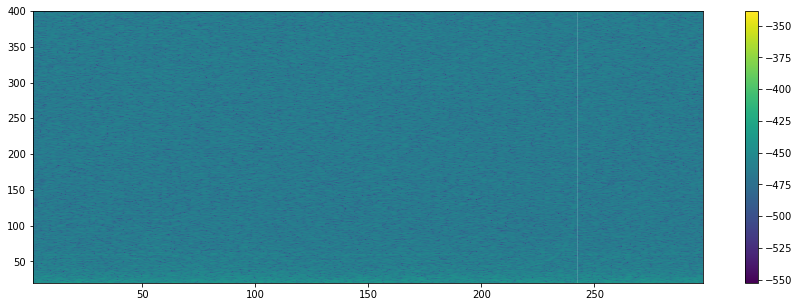

In [84]:
NFFT = 4 * fs
plt.figure(figsize=(15, 5))
Pxx, freqs, bins, im = plt.specgram(data_, mode='psd', NFFT=NFFT, Fs=fs, noverlap=int(0.9*NFFT))
plt.colorbar()
plt.axvline(1842.43-1600, c='white', lw=0.5, alpha=0.3)
plt.axis(ymin=20, ymax=400)
plt.show()

It is a little easier to see the event if we resample to a log frequency space.

In [69]:
from scipy.interpolate import interp1d

flog = np.logspace(np.log10(25), np.log10(400), num=200)

newamps = []
for amps in Pxx.T:
    f = interp1d(freqs, amps, bounds_error=False, fill_value=0, kind='cubic')
    newamps.append(f(flog))
newamps = np.array(newamps).T

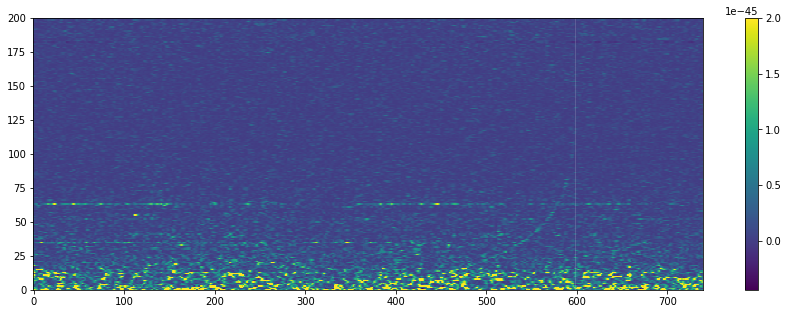

In [75]:
collision_time = 740 * (1842.43-1600)/300

plt.figure(figsize=(15, 5))
plt.imshow(newamps, aspect='auto', origin='lower', vmax=2e-45)
plt.colorbar()
plt.axvline(collision_time, c='white', lw=0.5, alpha=0.3)
plt.axis(ymin=0, ymax=200)
plt.show()

In [77]:
header  = "Gravitational wave arrival recorded at LIGO Livingston detector.\n"
header += "This record contains 300 s of noise-reduced data starting 242.43 s before collision.\n"
header += "M Vallisneri et al. \"The LIGO Open Science Center\", Proceedings of the\n"
header += "10th LISA Symposium, University of Florida, Gainesville, May 18-23, 2014.\n"
header += "https://doi.org/10.7935/K5B8566F\n"
header += "LIGO Project, unclear license but seems to be open.\n"
header += f"sample rate = {fs} Hz"

In [78]:
np.savetxt(f'benchmark_signals/ligo_{fs:.0f}Hz.txt', data_, header=header)

M Vallisneri et al. "The LIGO Open Science Center", proceedings of the 10th LISA Symposium, University of Florida, Gainesville, May 18-23, 2014; also arxiv:1410.4839 

"This research has made use of data, software and/or web tools obtained from the LIGO Open Science Center (https://losc.ligo.org), a service of LIGO Laboratory, the LIGO Scientific Collaboration and the Virgo Collaboration. LIGO is funded by the U.S. National Science Foundation. Virgo is funded by the French Centre National de Recherche Scientifique (CNRS), the Italian Istituto Nazionale della Fisica Nucleare (INFN) and the Dutch Nikhef, with contributions by Polish and Hungarian institutes." 